In [1]:
library(faraway)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [163]:
null_model1 <- lm(total ~ 1, data = sat)
summary(null_model1)
knitr::kable(anova(null_model1))


Call:
lm(formula = total ~ 1, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-121.92  -68.67  -20.42   66.08  141.08 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   965.92      10.58   91.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 74.82 on 49 degrees of freedom




|          | Df|   Sum Sq|  Mean Sq| F value| Pr(>F)|
|:---------|--:|--------:|--------:|-------:|------:|
|Residuals | 49| 274307.7| 5598.116|      NA|     NA|

In [164]:
sat_model1 <- lm(total ~ expend + ratio + salary, data = sat)
summary(sat_model1)
knitr::kable(anova(null_model1, sat_model1))
knitr::kable(anova(sat_model1))

SST <- sum((sat$total - mean(sat$total))^2)
SSR <- sum((sat_model1$fitted.values - mean(sat$total))^2)
SSE <- sum((sat$total - sat_model1$fitted.values)^2)
MSR <- SSR/(sat_model1$rank - 1)
MSE <- SSE/(nrow(sat) - sat_model1$rank)
df_vector <- c(sat_model1$rank - 1, nrow(sat) - sat_model1$rank, nrow(sat) - 1)
SS <- c(SSR, SSE, SST)

anova_table <- as_tibble(cbind(df_vector, SS))

anova_table <- anova_table %>% mutate(MS = SS/df_vector)

anova_table[3,3] <- NA

F_stat <- c(as.numeric(anova_table[1,3] / anova_table[2,3]), NA, NA)

p_value <- c(1 - (pf(F_stat[1], (sat_model1$rank - 1) , (nrow(sat) - sat_model1$rank))), NA, NA)

anova_table <- cbind(anova_table, F_stat, p_value)

knitr::kable(anova_table)


Call:
lm(formula = total ~ expend + ratio + salary, data = sat)

Residuals:
     Min       1Q   Median       3Q      Max 
-140.911  -46.740   -7.535   47.966  123.329 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1069.234    110.925   9.639 1.29e-12 ***
expend        16.469     22.050   0.747   0.4589    
ratio          6.330      6.542   0.968   0.3383    
salary        -8.823      4.697  -1.878   0.0667 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68.65 on 46 degrees of freedom
Multiple R-squared:  0.2096,	Adjusted R-squared:  0.1581 
F-statistic: 4.066 on 3 and 46 DF,  p-value: 0.01209




| Res.Df|      RSS| Df| Sum of Sq|        F|    Pr(>F)|
|------:|--------:|--:|---------:|--------:|---------:|
|     49| 274307.7| NA|        NA|       NA|        NA|
|     46| 216811.9|  3|  57495.74| 4.066203| 0.0120861|



|          | Df|     Sum Sq|   Mean Sq|   F value|    Pr(>F)|
|:---------|--:|----------:|---------:|---------:|---------:|
|expend    |  1|  39722.059| 39722.059| 8.4276482| 0.0056579|
|ratio     |  1|   1142.671|  1142.671| 0.2424354| 0.6247946|
|salary    |  1|  16631.014| 16631.014| 3.5285264| 0.0666677|
|Residuals | 46| 216811.935|  4713.303|        NA|        NA|



| df_vector|        SS|        MS|   F_stat|   p_value|
|---------:|---------:|---------:|--------:|---------:|
|         3|  57495.74| 19165.248| 4.066203| 0.0120861|
|        46| 216811.94|  4713.303|       NA|        NA|
|        49| 274307.68|        NA|       NA|        NA|

In [166]:
sat_model2 <- lm(total ~ expend + ratio + salary + takers, data = sat)
summary(sat_model2)
knitr::kable(anova(null_model1, sat_model2))
knitr::kable(anova(sat_model1, sat_model2))
knitr::kable(anova(sat_model2))

SST <- sum((sat$total - mean(sat$total))^2)
SSR <- sum((sat_model2$fitted.values - mean(sat$total))^2)
SSE <- sum((sat$total - sat_model2$fitted.values)^2)
MSR <- SSR/(sat_model2$rank - 1)
MSE <- SSE/(nrow(sat) - sat_model2$rank)
df_vector <- c(sat_model2$rank - 1, nrow(sat) - sat_model2$rank, nrow(sat) - 1)
SS <- c(SSR, SSE, SST)

anova_table <- as_tibble(cbind(df_vector, SS))

anova_table <- anova_table %>% mutate(MS = SS/df_vector)

anova_table[3,3] <- NA

F_stat <- c(as.numeric(anova_table[1,3] / anova_table[2,3]), NA, NA)

p_value <- c(1 - (pf(F_stat[1], (sat_model2$rank - 1) , (nrow(sat) - sat_model2$rank))), NA, NA)

anova_table <- cbind(anova_table, F_stat, p_value)

knitr::kable(anova_table)


Call:
lm(formula = total ~ expend + ratio + salary + takers, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.531 -20.855  -1.746  15.979  66.571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1045.9715    52.8698  19.784  < 2e-16 ***
expend         4.4626    10.5465   0.423    0.674    
ratio         -3.6242     3.2154  -1.127    0.266    
salary         1.6379     2.3872   0.686    0.496    
takers        -2.9045     0.2313 -12.559 2.61e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.7 on 45 degrees of freedom
Multiple R-squared:  0.8246,	Adjusted R-squared:  0.809 
F-statistic: 52.88 on 4 and 45 DF,  p-value: < 2.2e-16




| Res.Df|      RSS| Df| Sum of Sq|        F| Pr(>F)|
|------:|--------:|--:|---------:|--------:|------:|
|     49| 274307.7| NA|        NA|       NA|     NA|
|     45|  48123.9|  4|  226183.8| 52.87534|      0|



| Res.Df|      RSS| Df| Sum of Sq|        F| Pr(>F)|
|------:|--------:|--:|---------:|--------:|------:|
|     46| 216811.9| NA|        NA|       NA|     NA|
|     45|  48123.9|  1|    168688| 157.7379|      0|



|          | Df|     Sum Sq|    Mean Sq|    F value|    Pr(>F)|
|:---------|--:|----------:|----------:|----------:|---------:|
|expend    |  1|  39722.059|  39722.059|  37.143557| 0.0000002|
|ratio     |  1|   1142.671|   1142.671|   1.068496| 0.3068088|
|salary    |  1|  16631.014|  16631.014|  15.551435| 0.0002779|
|takers    |  1| 168688.039| 168688.039| 157.737888| 0.0000000|
|Residuals | 45|  48123.896|   1069.420|         NA|        NA|



| df_vector|       SS|       MS|   F_stat| p_value|
|---------:|--------:|--------:|--------:|-------:|
|         4| 226183.8| 56545.95| 52.87534|       0|
|        45|  48123.9|  1069.42|       NA|      NA|
|        49| 274307.7|       NA|       NA|      NA|

There is not enough evidence to reject the null hypothesis that $\beta_{salary}$ is zero. The p value is above the critical value of 0.025.

In [33]:
knitr::kable(anova(sat_model1, sat_model2))



| Res.Df|      RSS| Df| Sum of Sq|        F| Pr(>F)|
|------:|--------:|--:|---------:|--------:|------:|
|     46| 216811.9| NA|        NA|       NA|     NA|
|     45|  48123.9|  1|    168688| 157.7379|      0|

In [6]:
#3.7
punting %>% head()

,Distance,Hang,RStr,LStr,RFlex,LFlex,OStr
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,162.50,4.75,170,170,106,106,240.57
2,144.00,4.07,140,130,92,93,195.49
3,147.50,4.04,180,170,93,78,152.99
4,163.50,4.18,160,160,103,93,197.09
5,192.00,4.35,170,150,104,93,266.56
6,171.75,4.16,150,150,101,87,260.56


In [231]:
# a)
pun_model1 <- lm(Distance ~ RStr + LStr + RFlex + LFlex, data = punting)
summary(pun_model1)


Call:
lm(formula = Distance ~ RStr + LStr + RFlex + LFlex, data = punting)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.941  -8.958  -4.441  13.523  17.016 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -79.6236    65.5935  -1.214    0.259
RStr          0.5116     0.4856   1.054    0.323
LStr         -0.1862     0.5130  -0.363    0.726
RFlex         2.3745     1.4374   1.652    0.137
LFlex        -0.5277     0.8255  -0.639    0.541

Residual standard error: 16.33 on 8 degrees of freedom
Multiple R-squared:  0.7365,	Adjusted R-squared:  0.6047 
F-statistic:  5.59 on 4 and 8 DF,  p-value: 0.01902


None of the predictors are signifigant at the 5% level

In [232]:
#b)

null_model1 <- lm(Distance ~ 1, data = punting)
summary(null_model1)
anova(null_model1, pun_model1)


Call:
lm(formula = Distance ~ 1, data = punting)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.303  -7.983   1.937  15.267  43.767 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  148.233      7.203   20.58 9.99e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.97 on 12 degrees of freedom


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12,8093.308,NA,NA,NA,NA
2,8,2132.641,4,5960.668,5.589941,0.01902482


In [233]:
#c)
pun_model2 <- lm(Distance ~ RStr + LStr, data = punting)
summary(pun_model2)
anova(pun_model2)


Call:
lm(formula = Distance ~ RStr + LStr, data = punting)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.280  -9.583   3.147  10.266  26.450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  12.8490    33.0334   0.389    0.705
RStr          0.7208     0.4913   1.467    0.173
LStr          0.2011     0.4883   0.412    0.689

Residual standard error: 17.24 on 10 degrees of freedom
Multiple R-squared:  0.6327,	Adjusted R-squared:  0.5592 
F-statistic: 8.611 on 2 and 10 DF,  p-value: 0.00669


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RStr,1,5069.80896,5069.80896,17.0524211,0.00204596
LStr,1,50.42669,50.42669,0.1696114,0.68914615
Residuals,10,2973.07282,297.30728,NA,NA


In [234]:
SST <- sum((punting$Distance - mean(punting$Distance))^2)
SSR <- sum((pun_model2$fitted.values - mean(punting$Distance))^2)
SSE <- sum((punting$Distance - pun_model2$fitted.values)^2)
MSR <- SSR/(pun_model2$rank - 1)
MSE <- SSE/(nrow(punting) - pun_model2$rank)
df_vector <- c(pun_model2$rank - 1, nrow(punting) - pun_model2$rank, nrow(punting) - 1)
SS <- c(SSR, SSE, SST)

anova_table <- as_tibble(cbind(df_vector, SS))

anova_table <- anova_table %>% mutate(MS = SS/df_vector)

anova_table[3,3] <- NA

F_stat <- c(as.numeric(anova_table[1,3] / anova_table[2,3]), NA, NA)

p_value <- c(1 - (pf(F_stat[1], (pun_model2$rank - 1) , (nrow(punting) - pun_model2$rank))), NA, NA)

anova_table <- cbind(anova_table, F_stat, p_value)

knitr::kable(anova_table)



| df_vector|       SS|        MS|   F_stat|   p_value|
|---------:|--------:|---------:|--------:|---------:|
|         2| 5120.236| 2560.1178| 8.611016| 0.0066896|
|        10| 2973.073|  297.3073|       NA|        NA|
|        12| 8093.308|        NA|       NA|        NA|

In [235]:
anova(pun_model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RStr,1,5069.80896,5069.80896,19.0179581,0.002409544
LStr,1,50.42669,50.42669,0.1891615,0.675109657
RFlex,1,731.48721,731.48721,2.7439679,0.136213140
LFlex,1,108.94490,108.94490,0.4086761,0.540510899
Residuals,8,2132.64071,266.58009,NA,NA


In [236]:
anova(pun_model2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RStr,1,5069.80896,5069.80896,17.0524211,0.00204596
LStr,1,50.42669,50.42669,0.1696114,0.68914615
Residuals,10,2973.07282,297.30728,NA,NA


In [238]:
anova(null_model1, pun_model2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12,8093.308,NA,NA,NA,NA
2,10,2973.073,2,5120.236,8.611016,0.006689556


In [13]:
#d)
confint(pun_model1)

,2.5 %,97.5 %
(Intercept),-230.8826019,71.6353107
RStr,-0.6080871,1.6313618
LStr,-1.3690973,0.9966981
RFlex,-0.9400454,5.6890474
LFlex,-2.4313762,1.3759086


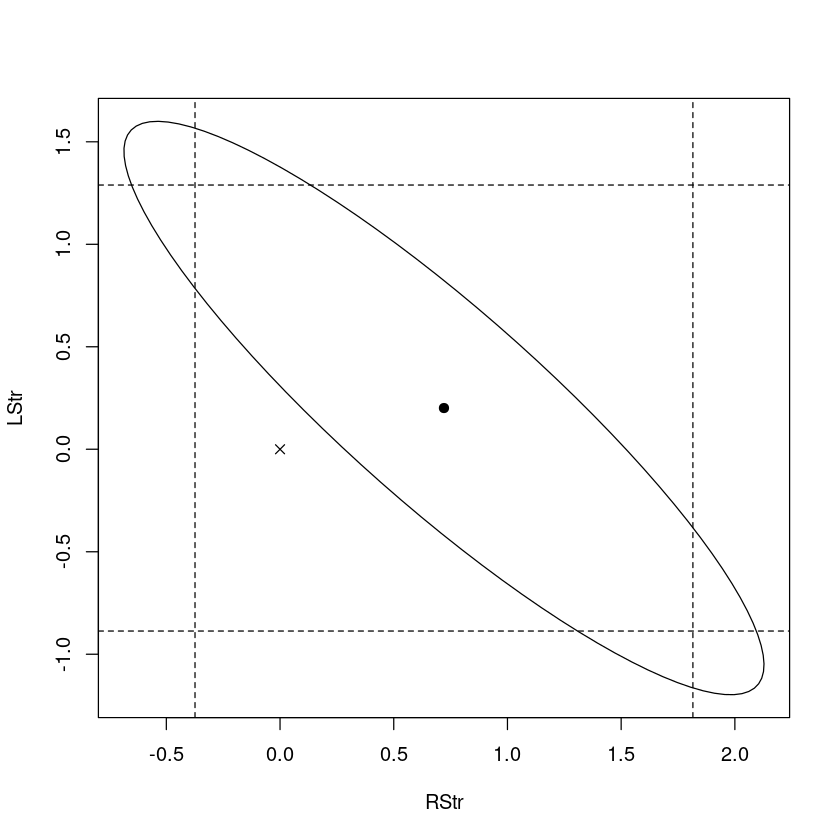

In [239]:
library(ellipse)
plot(ellipse(pun_model2, c(2,3)), type = 'l')
points(pun_model2$coefficients[2], pun_model2$coefficients[3], pch = 19)
points(0,0, pch = 4)
abline(v = confint(pun_model2)[2, ], lty = 2)
abline(h = confint(pun_model2)[3, ], lty = 2)

In [77]:
anova(pun_model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RStr,1,5069.80896,5069.80896,19.0179581,0.002409544
LStr,1,50.42669,50.42669,0.1891615,0.675109657
RFlex,1,731.48721,731.48721,2.7439679,0.136213140
LFlex,1,108.94490,108.94490,0.4086761,0.540510899
Residuals,8,2132.64071,266.58009,NA,NA


In [78]:
anova(null_model1, pun_model1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12,8093.308,NA,NA,NA,NA
2,8,2132.641,4,5960.668,5.589941,0.01902482


In [158]:
SST <- sum((punting$Distance - mean(punting$Distance))^2)
SSR <- sum((pun_model1$fitted.values - mean(punting$Distance))^2)
SSE <- sum((punting$Distance - pun_model1$fitted.values)^2)
MSR <- SSR/(pun_model1$rank - 1)
MSE <- SSE/(nrow(punting) - pun_model1$rank)
df_vector <- c(pun_model1$rank - 1, nrow(punting) - pun_model1$rank, nrow(punting) - 1)
SS <- c(SSR, SSE, SST)

anova_table <- as_tibble(cbind(df_vector, SS))

anova_table <- anova_table %>% mutate(MS = SS/df_vector)

anova_table[3,3] <- NA

F_stat <- c(as.numeric(anova_table[1,3] / anova_table[2,3]), NA, NA)

p_value <- c(1 - (pf(F_stat[1], (pun_model1$rank - 1) , (nrow(punting) - pun_model1$rank))), NA, NA)

anova_table <- cbind(anova_table, F_stat, p_value)

In [167]:
summary(pun_model1)
knitr::kable(anova_table)


Call:
lm(formula = Distance ~ RStr + LStr + RFlex + LFlex, data = punting)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.941  -8.958  -4.441  13.523  17.016 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -79.6236    65.5935  -1.214    0.259
RStr          0.5116     0.4856   1.054    0.323
LStr         -0.1862     0.5130  -0.363    0.726
RFlex         2.3745     1.4374   1.652    0.137
LFlex        -0.5277     0.8255  -0.639    0.541

Residual standard error: 16.33 on 8 degrees of freedom
Multiple R-squared:  0.7365,	Adjusted R-squared:  0.6047 
F-statistic:  5.59 on 4 and 8 DF,  p-value: 0.01902




| df_vector|       SS|       MS|   F_stat| p_value|
|---------:|--------:|--------:|--------:|-------:|
|         4| 226183.8| 56545.95| 52.87534|       0|
|        45|  48123.9|  1069.42|       NA|      NA|
|        49| 274307.7|       NA|       NA|      NA|

In [225]:
summary(pun_model2)


Call:
lm(formula = Distance ~ RStr + LStr, data = punting)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.280  -9.583   3.147  10.266  26.450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  12.8490    33.0334   0.389    0.705
RStr          0.7208     0.4913   1.467    0.173
LStr          0.2011     0.4883   0.412    0.689

Residual standard error: 17.24 on 10 degrees of freedom
Multiple R-squared:  0.6327,	Adjusted R-squared:  0.5592 
F-statistic: 8.611 on 2 and 10 DF,  p-value: 0.00669


In [212]:
for(i in names(pun_model1)){
    print(pun_model1[i])
    }

$coefficients
(Intercept)        RStr        LStr       RFlex       LFlex 
-79.6236456   0.5116373  -0.1861996   2.3745010  -0.5277338 

$residuals
         1          2          3          4          5          6          7 
 -8.958093   6.825517 -12.982499  -4.440752  14.706378   8.646225 -12.345099 
         8          9         10         11         12         13 
 -6.900083 -23.940863  -6.569137  17.016426  13.523251  15.418728 

$effects
(Intercept)        RStr        LStr       RFlex       LFlex             
-534.461960   71.202591    7.101176  -27.046020  -10.437667   -2.415226 
                                                                        
  -9.304684   -7.312492  -27.143414  -10.914924   -5.274829   21.329014 
            
  25.457937 

$rank
[1] 5

$fitted.values
       1        2        3        4        5        6        7        8 
171.4581 137.1745 160.4825 167.9408 177.2936 163.1038 174.3451 111.8301 
       9       10       11       12       13 
129.6109 124.

In [241]:
print(anova(pun_model1, pun_model2))

Analysis of Variance Table

Model 1: Distance ~ RStr + LStr + RFlex + LFlex
Model 2: Distance ~ RStr + LStr
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1      8 2132.6                           
2     10 2973.1 -2   -840.43 1.5763 0.2648


In [210]:
predictor_list <- attributes(pun_model1$terms)$variables

In [220]:
(pun_model1$model)$predictor_list[[2]]

NULL

In [221]:
predictor_list[[3]]

RStr

In [245]:
knitr::kable(print(anova(sat_model1, sat_model2)))

Analysis of Variance Table

Model 1: total ~ expend + ratio + salary
Model 2: total ~ expend + ratio + salary + takers
  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1     46 216812                                  
2     45  48124  1    168688 157.74 2.607e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




| Res.Df|      RSS| Df| Sum of Sq|        F| Pr(>F)|
|------:|--------:|--:|---------:|--------:|------:|
|     46| 216811.9| NA|        NA|       NA|     NA|
|     45|  48123.9|  1|    168688| 157.7379|      0|